# Basic statistics with pyclesperanto
A common use case for image processing in the biology context is deriving statistics of segmented objects. clEsperanto offers a function for that: [statistics_of_labelled_pixels](https://clij.github.io/clij2-docs/reference_statisticsOfLabelledPixels).

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

cl.OCLArray([[ 0,  0,  0, ..., 62, 62, 62],
       [ 0,  0,  0, ..., 62, 62, 62],
       [ 0,  0,  0, ..., 62, 62, 62],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
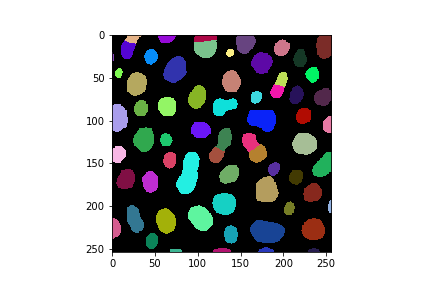

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')

# segment the image
labels = cle.voronoi_otsu_labeling(image, spot_sigma=3.5)
labels

## Deriving basic statistics of labelled objects

In [3]:
statistics = cle.statistics_of_labelled_pixels(image, labels)
statistics.keys()

dict_keys(['label', 'original_label', 'bbox_min_x', 'bbox_min_y', 'bbox_min_z', 'bbox_max_x', 'bbox_max_y', 'bbox_max_z', 'bbox_width', 'bbox_height', 'bbox_depth', 'min_intensity', 'max_intensity', 'sum_intensity', 'area', 'mean_intensity', 'sum_intensity_times_x', 'mass_center_x', 'sum_intensity_times_y', 'mass_center_y', 'sum_intensity_times_z', 'mass_center_z', 'sum_x', 'centroid_x', 'sum_y', 'centroid_y', 'sum_z', 'centroid_z', 'sum_distance_to_centroid', 'mean_distance_to_centroid', 'sum_distance_to_mass_center', 'mean_distance_to_mass_center', 'standard_deviation_intensity', 'max_distance_to_centroid', 'max_distance_to_mass_center', 'mean_max_distance_to_centroid_ratio', 'mean_max_distance_to_mass_center_ratio'])

We can use [pandas](https://pandas.pydata.org/) to process that kind of tabular data. 

In [4]:
import pandas as pd

In [5]:
table = pd.DataFrame(statistics)
table

,label,original_label,bbox_min_x,bbox_min_y,bbox_min_z,bbox_max_x,bbox_max_y,bbox_max_z,bbox_width,bbox_height,...,centroid_z,sum_distance_to_centroid,mean_distance_to_centroid,sum_distance_to_mass_center,mean_distance_to_mass_center,standard_deviation_intensity,max_distance_to_centroid,max_distance_to_mass_center,mean_max_distance_to_centroid_ratio,mean_max_distance_to_mass_center_ratio
0,1,1,0.0,21.0,0.0,1.0,31.0,0.0,2.0,11.0,...,0.0,47.922073,2.522214,47.929977,2.522630,7.922058,5.227512,5.243006,2.072588,2.078388
1,2,2,0.0,214.0,0.0,10.0,238.0,0.0,11.0,25.0,...,0.0,1266.508057,6.178088,1268.942139,6.189961,33.201111,12.717123,12.594790,2.058424,2.034712
2,3,3,0.0,82.0,0.0,18.0,113.0,0.0,19.0,32.0,...,0.0,4528.084473,8.984295,4535.979492,8.999960,28.556467,16.489189,16.512506,1.835335,1.834731
3,4,4,0.0,130.0,0.0,15.0,149.0,0.0,16.0,20.0,...,0.0,1631.811523,6.181104,1631.823853,6.181151,26.892637,10.292731,10.271444,1.665193,1.661736
4,5,5,4.0,40.0,0.0,12.0,50.0,0.0,9.0,11.0,...,0.0,262.221252,3.361811,262.298126,3.362797,16.049889,5.444176,5.493224,1.619418,1.633529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,61,235.0,63.0,0.0,255.0,83.0,0.0,21.0,21.0,...,0.0,2511.701416,7.115301,2511.793213,7.115561,27.741562,11.912864,11.958512,1.674260,1.680614
61,62,62,237.0,0.0,0.0,255.0,28.0,0.0,19.0,29.0,...,0.0,4084.937988,8.581803,4091.146729,8.594847,29.704020,15.775529,15.264710,1.838253,1.776031
62,63,63,245.0,95.0,0.0,255.0,114.0,0.0,11.0,20.0,...,0.0,951.966064,5.408898,953.429626,5.417214,28.632755,11.004044,10.833899,2.034433,1.999902
63,64,64,233.0,137.0,0.0,255.0,166.0,0.0,23.0,30.0,...,0.0,4177.572754,8.776414,4186.144043,8.794420,32.460228,18.671247,18.135679,2.127435,2.062180


In [6]:
table.describe()

,label,original_label,bbox_min_x,bbox_min_y,bbox_min_z,bbox_max_x,bbox_max_y,bbox_max_z,bbox_width,bbox_height,...,centroid_z,sum_distance_to_centroid,mean_distance_to_centroid,sum_distance_to_mass_center,mean_distance_to_mass_center,standard_deviation_intensity,max_distance_to_centroid,max_distance_to_mass_center,mean_max_distance_to_centroid_ratio,mean_max_distance_to_mass_center_ratio
count,65.00000,65.00000,65.000000,65.000000,65.0,65.000000,65.000000,65.0,65.000000,65.000000,...,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,33.00000,33.00000,119.769234,109.030769,0.0,138.523071,129.138458,0.0,19.753845,21.107693,...,0.0,2702.918701,6.862533,2703.701416,6.865005,28.897293,12.061926,12.068190,1.767830,1.767646
std,18.90767,18.90767,78.592453,77.589058,0.0,79.092728,77.868858,0.0,6.564656,7.858362,...,0.0,2297.490234,2.093009,2297.711426,2.092989,5.840157,3.788192,3.811944,0.179782,0.175480
min,1.00000,1.00000,0.000000,0.000000,0.0,1.000000,8.000000,0.0,2.000000,4.000000,...,0.0,47.922073,2.522214,47.929977,2.522630,7.922058,4.776695,4.797967,1.548767,1.555610
25%,17.00000,17.00000,53.000000,42.000000,0.0,73.000000,61.000000,0.0,16.000000,18.000000,...,0.0,1056.172241,5.498612,1056.191772,5.502826,26.377256,9.446907,9.467342,1.627272,1.635578
50%,33.00000,33.00000,120.000000,108.000000,0.0,143.000000,130.000000,0.0,20.000000,21.000000,...,0.0,1781.911133,6.736742,1781.942261,6.738640,29.165783,11.835219,11.808653,1.702164,1.711959
75%,49.00000,49.00000,189.000000,166.000000,0.0,204.000000,195.000000,0.0,23.000000,26.000000,...,0.0,4038.744873,8.511447,4039.096680,8.506598,32.460228,14.076573,14.051637,1.838253,1.834731
max,65.00000,65.00000,251.000000,250.000000,0.0,255.000000,253.000000,0.0,40.000000,50.000000,...,0.0,12003.949219,13.352557,12001.027344,13.349307,40.017853,26.360050,26.960522,2.231342,2.207110
